In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a model class
class model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=8,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)# input layer
        self.fc2 = nn.Linear(h1,h2)# hidden layer
        self.out = nn.Linear(h2,out_features)# output layer
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = model()

# training

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
# we have to change last coloumn number
my_df["variety"]=my_df["variety"].map({'Setosa':0,'Versicolor':1,'Virginica':2})
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
#train
X = my_df.drop('variety',axis=1).values# features
y = my_df['variety'].values# target
X,y


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [10]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#model.parameter will give a flow of parameters to optimizer

In [12]:
epochs = 100
losses=[]
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    # print(loss)
    losses.append(loss.detach().numpy())#detach will remove the gradient from the loss
    if i%10==0:
        print(f'epoch {i} and loss is: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 1.1318365335464478
epoch 10 and loss is: 0.9658561944961548
epoch 20 and loss is: 0.678993821144104
epoch 30 and loss is: 0.4004894196987152
epoch 40 and loss is: 0.2250950187444687
epoch 50 and loss is: 0.12207333743572235
epoch 60 and loss is: 0.07481686770915985
epoch 70 and loss is: 0.05451279506087303
epoch 80 and loss is: 0.044374920427799225
epoch 90 and loss is: 0.03837944194674492


[array(1.1318365, dtype=float32), array(1.10546, dtype=float32), array(1.0850837, dtype=float32), array(1.0685444, dtype=float32), array(1.0551827, dtype=float32), array(1.0421821, dtype=float32), array(1.0290112, dtype=float32), array(1.0158466, dtype=float32), array(1.0012665, dtype=float32), array(0.98495996, dtype=float32), array(0.9658562, dtype=float32), array(0.9447166, dtype=float32), array(0.92169493, dtype=float32), array(0.8967496, dtype=float32), array(0.8700475, dtype=float32), array(0.8412636, dtype=float32), array(0.8103017, dtype=float32), array(0.77780235, dtype=float32), array(0.7448156, dtype=float32), array(0.7118044, dtype=float32), array(0.6789938, dtype=float32), array(0.6465751, dtype=float32), array(0.614783, dtype=float32), array(0.5836231, dtype=float32), array(0.55345577, dtype=float32), array(0.5246387, dtype=float32), array(0.4972258, dtype=float32), array(0.47115162, dtype=float32), array(0.44640508, dtype=float32), array(0.4229694, dtype=float32), array(

Text(0.5, 0, 'Epoch')

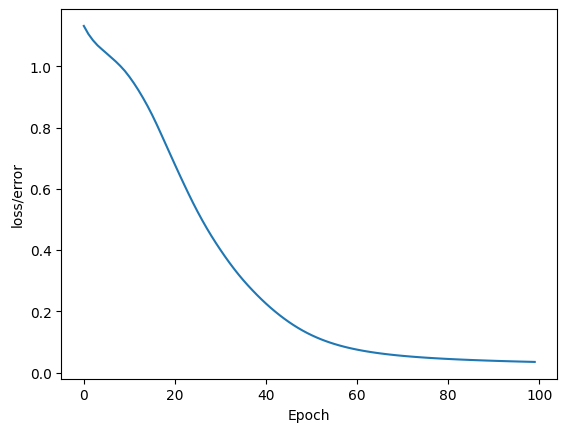

In [13]:
# Graph 
print(losses)
plt.plot(range(epochs), losses)# range(epochs) will give the number of epochs
plt.ylabel("loss/error")
plt.xlabel('Epoch')

     

## test 

In [14]:
#evaluating the model on test data
with torch.no_grad():# we don't want to calculate the gradient
    y_eval = model.forward(X_test)# we are predicting the test data
    loss = criterion(y_eval,y_test)

In [15]:
loss

tensor(0.1458)

In [21]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):# enumerate will give the index and data
        y_val = model.forward(data)
        print(f'{i+1}. {str(y_val)} test value->{y_test[i]} pridicted-> {y_val.argmax().item()}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct!')


1. tensor([-7.7212,  1.5826,  4.8685]) test value->2 pridicted-> 2
2. tensor([-10.2316,   0.5146,   8.7767]) test value->2 pridicted-> 2
3. tensor([-10.7282,   1.1893,   8.2408]) test value->2 pridicted-> 2
4. tensor([-4.4743,  3.5419, -1.1241]) test value->1 pridicted-> 1
5. tensor([-9.0954,  1.4687,  6.2899]) test value->2 pridicted-> 2
6. tensor([-2.2803,  3.7077, -4.1196]) test value->1 pridicted-> 1
7. tensor([-7.0740,  2.2070,  3.2966]) test value->2 pridicted-> 2
8. tensor([-4.2271,  3.6553, -1.5467]) test value->1 pridicted-> 1
9. tensor([-8.0707,  1.8280,  4.7897]) test value->2 pridicted-> 2
10. tensor([-10.8583,   0.5051,   9.3761]) test value->2 pridicted-> 2
11. tensor([-6.8676,  2.2165,  3.0859]) test value->2 pridicted-> 2
12. tensor([  9.4382,   3.2638, -18.8717]) test value->0 pridicted-> 0
13. tensor([  8.6037,   2.9307, -17.1502]) test value->0 pridicted-> 0
14. tensor([-1.0594,  3.1702, -4.7116]) test value->1 pridicted-> 1
15. tensor([  8.0310,   3.2450, -16.7844])